## Importing library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Importing the dataset

In [2]:
# Load the training data
train_data = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print("Training Data Sample:")
display(train_data.head())
print(f"Training Data Shape: {train_data.shape}\n")

# Load the test data
test_data = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print("Test Data Sample:")
display(test_data.head())
print(f"Test Data Shape: {test_data.shape}\n")

# Load the test data solutions
test_solution_data = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print("Test Data Solution Sample:")
display(test_solution_data.head())
print(f"Test Data Solution Shape: {test_solution_data.shape}\n")


Training Data Sample:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Training Data Shape: (54214, 4)

Test Data Sample:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Test Data Shape: (54200, 4)

Test Data Solution Sample:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Test Data Solution Shape: (54200, 4)



## Performing data visualization

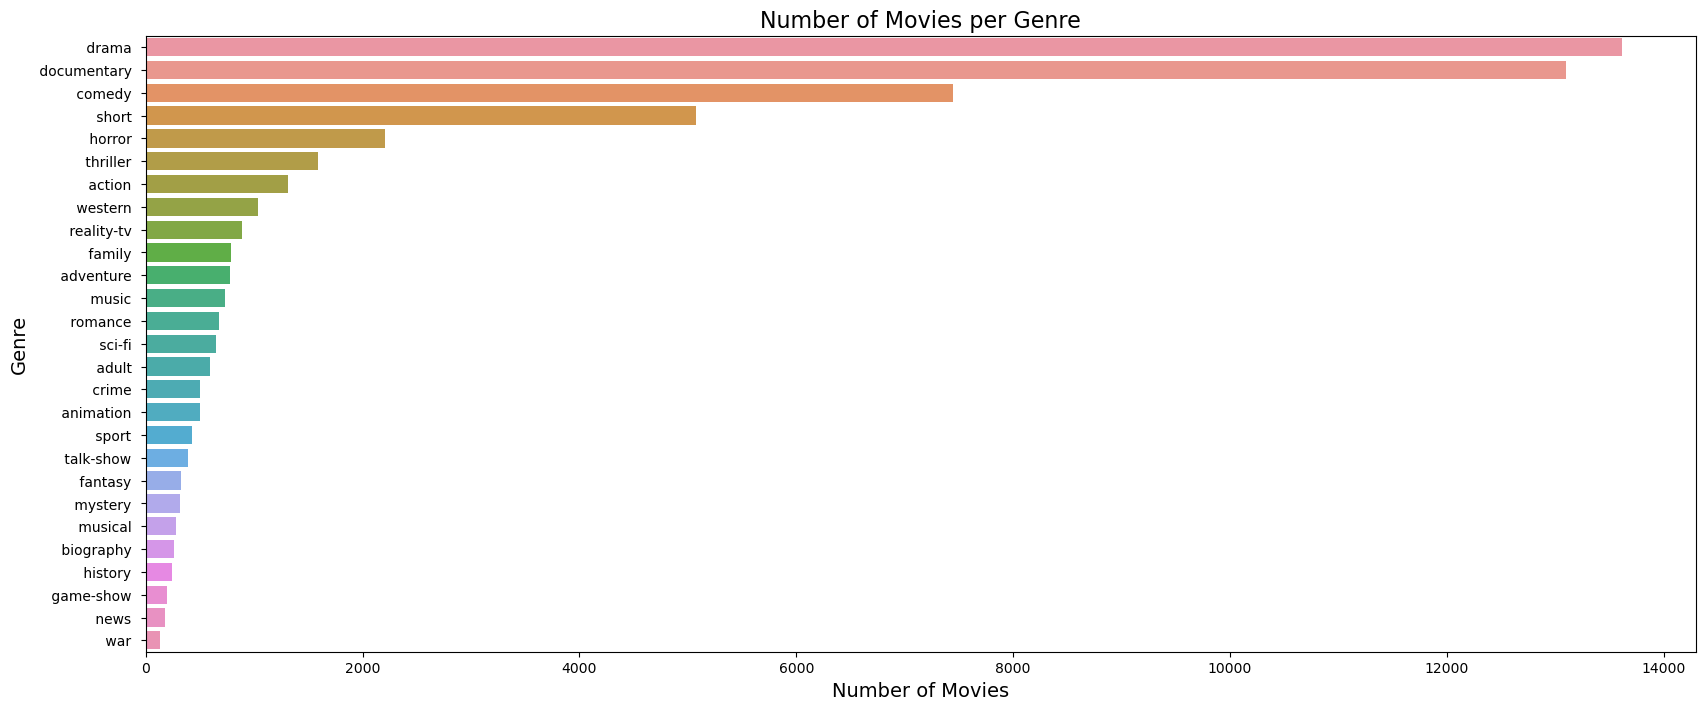

In [3]:
plt.figure(figsize=(20, 8))

# Plot the count of movies per genre
genre_order = train_data['GENRE'].value_counts().index
sns.countplot(y='GENRE', data=train_data, order=genre_order)

# Set the title and labels
plt.title('Number of Movies per Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
# Show the plot
plt.show()


## Bar Chart of Genre vs. Average Description Length

C:\Users\DELL\AppData\Local\Temp\ipykernel_9296\907104457.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GENRE', y='DESCRIPTION_LENGTH', data=train_data, estimator=np.mean, ci=None)


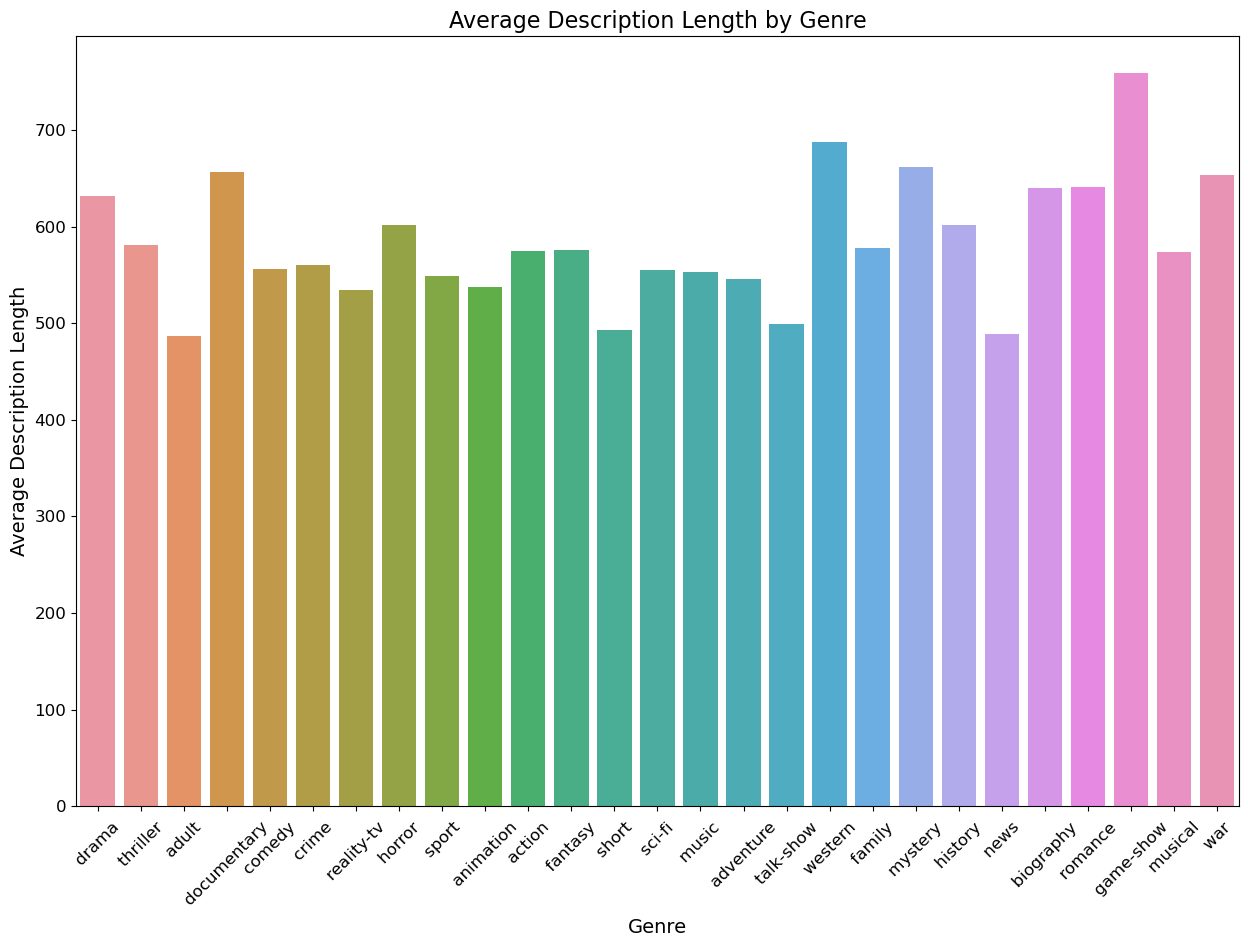

In [4]:
# Add a column for description length
train_data['DESCRIPTION_LENGTH'] = train_data['DESCRIPTION'].str.len()

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the average description length for each genre
sns.barplot(x='GENRE', y='DESCRIPTION_LENGTH', data=train_data, estimator=np.mean, ci=None)

# Set the title and labels
plt.title('Average Description Length by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Description Length', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


## Most Popular Genres Based on Viewing Frequency

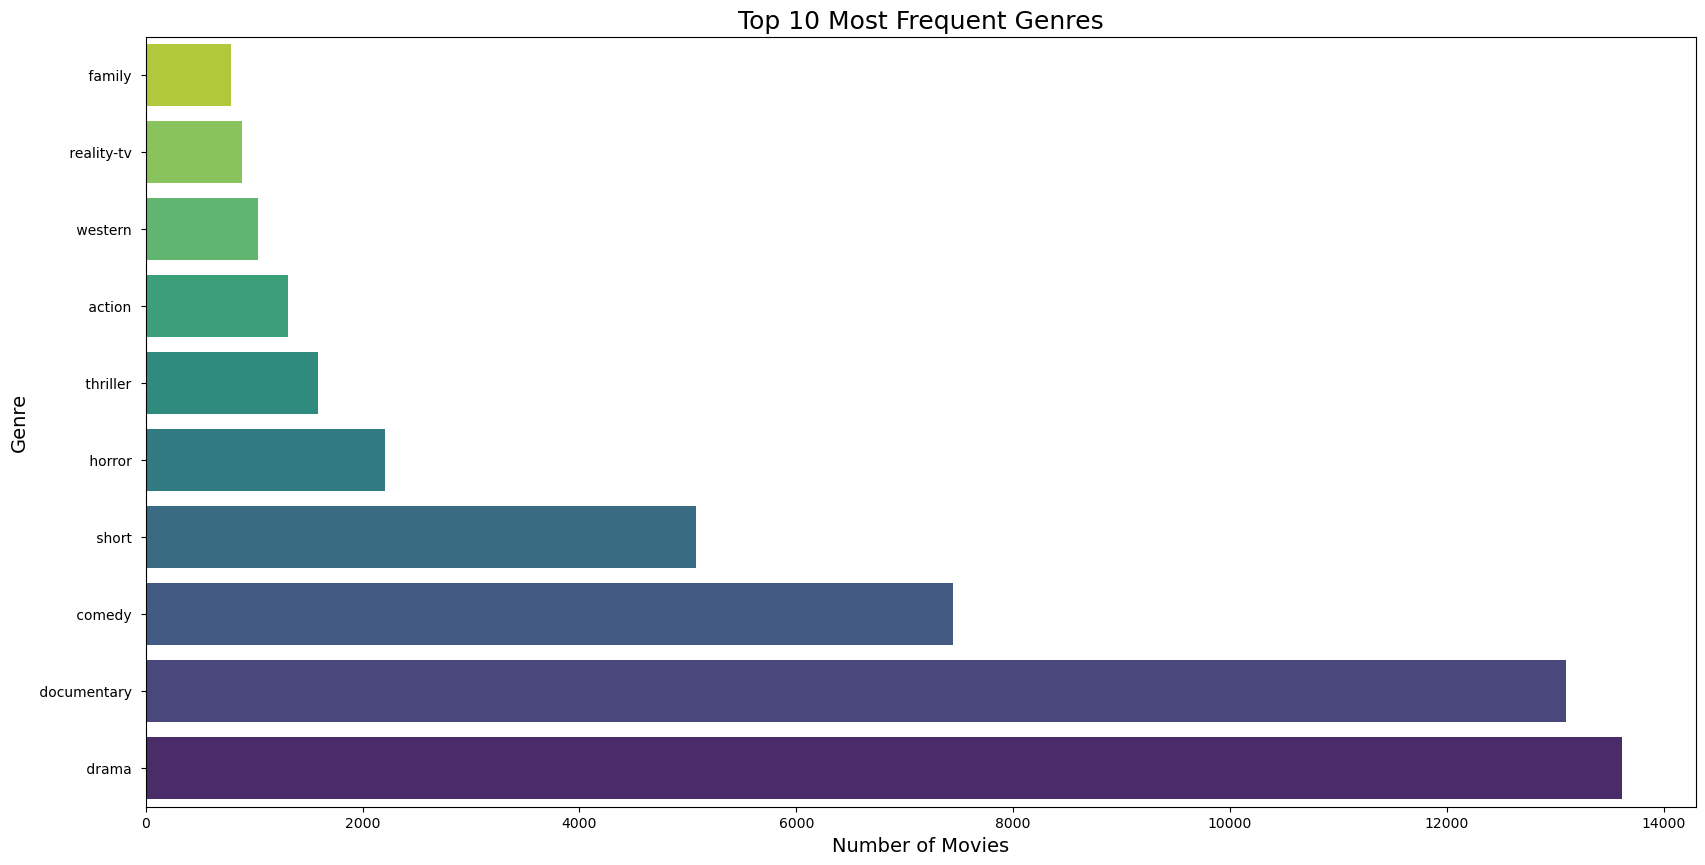

In [5]:
# Get the top 10 most frequent genres
top_genres = train_data['GENRE'].value_counts().head(10)

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a horizontal bar plot for the top genres
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

# Set the title and labels
plt.title('Top 10 Most Frequent Genres', fontsize=18)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Invert y-axis to have the genre with the most movies at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()


## Model Training and Evaluation

In [6]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Convert descriptions to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Encode the genres
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

# Split the training data into a smaller training set and a validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
classifier = LinearSVC()
classifier.fit(X_train_sub, y_train_sub)

# Make predictions on the validation set
y_val_pred = classifier.predict(X_val)

# Evaluate the model
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_report = classification_report(y_val, y_val_pred)

# Print the results
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print("\nValidation Classification Report:\n", validation_report)

Validation Accuracy: 0.5837

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
          16     

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Convert descriptions to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Encode the genres
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

# Initialize and train the model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)

# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:\n", test_report)


Test Accuracy: 0.0936

Test Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00      1314
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.00      0.00      0.00      7446
       crime        0.00      0.00      0.00       505
 documentary        0.00      0.00      0.00     13096
       drama        0.00      0.00      0.00     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.00      0.00      0.00       193
     history        0.00      0.00      0.00       243
      horror        0.00      0.00      0.00      2204
       music        0.00      0.00      0.00       731
     musical        0.00      0.00      0.00       276
     mystery

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict the genre of the movie

In [8]:
# Handle any potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Convert descriptions to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Encode the genres
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

# Initialize and train the model (e.g., LinearSVC)
clf = LinearSVC()
clf.fit(X_train, y_train)

# Function to predict movie genre
def predict_movie(description, t_v, clf, label_encoder):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

# Example usage:
sample_descr_for_movie = """
In tough economic times Max and Joey have all but run out of ideas until, they discover that senior housing is cheap. 
Not only that but Max's aunt just kicked the bucket and no one knows yet. 
In a hilarious series that always keeps you on your toes, the two friends take us on a cross-dressing, desperate and endearing ride through being broke.
"""
print(predict_movie(sample_descr_for_movie, tfidf_vectorizer, clf, label_encoder))

sample_descr_for_movie1 = "A movie where a person chases a girl to get married with him but the girl refuses him."
print(predict_movie(sample_descr_for_movie1, tfidf_vectorizer, clf, label_encoder))


 comedy 
 drama 
